In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.datasets import imdb
plt.style.use('seaborn')

In [36]:
((x,y),(xt,yt)) = imdb.load_data(num_words=10000)

In [37]:
idx_word = dict([value,key] for (key,value) in imdb.get_word_index().items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in x[0]])
print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [38]:
# Create a 2D Tensor to be processed/given as input to the embedding layer
from keras.preprocessing import sequence
X_train = sequence.pad_sequences(x,maxlen=500)
X_test = sequence.pad_sequences(xt,maxlen=500)

In [39]:
# print(X_train[0])

In [40]:
from keras.layers import Embedding,SimpleRNN,Dense
from keras.models import Sequential

model = Sequential()
#first parameter = vocab size, second= output shape of word embeddings so every word will be a
#vector of size 1x64
model.add(Embedding(10000,64)) 
# parameter = size of context vector/ activation vector
model.add(SimpleRNN(32)) 
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [41]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
checkpoint=ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True)
earlystop=EarlyStopping(monitor='val_acc',patience=1)

In [42]:
hist = model.fit(X_train,y,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Epoch 1/10
157/157 [==============================] - 52s 329ms/step - loss: 0.5472 - acc: 0.7061 - val_loss: 0.5736 - val_acc: 0.6982
Epoch 2/10
157/157 [==============================] - 51s 328ms/step - loss: 0.3476 - acc: 0.8579 - val_loss: 0.3893 - val_acc: 0.8398
Epoch 3/10
157/157 [==============================] - 52s 332ms/step - loss: 0.2644 - acc: 0.8961 - val_loss: 0.3998 - val_acc: 0.8368


In [43]:
model.load_weights("best_model.h5")

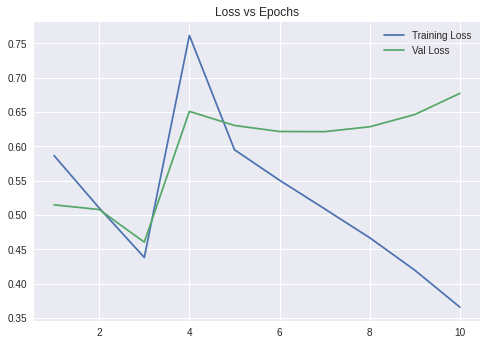

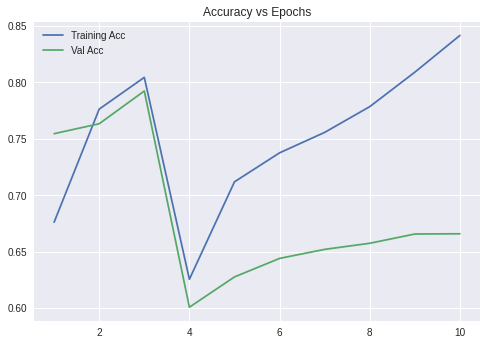

In [32]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()



plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

In [44]:
model.evaluate(X_test,yt)

782/782 [==============================] - 23s 29ms/step - loss: 0.3872 - acc: 0.8382


[0.38719284534454346, 0.8382400274276733]

In [45]:
model.evaluate(X_train,y)

782/782 [==============================] - 23s 29ms/step - loss: 0.2703 - acc: 0.8963


[0.27031904458999634, 0.8962799906730652]